In [1]:
# Import Library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Model
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [22]:
X_train = np.load('./test/X_train.npy')
Y_train = np.load('./test/Y_train.npy')
X_test = np.load('./test/X_test.npy')
Y_test = np.load('./test/Y_test.npy')
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3000, 64, 64, 3) (3000, 3)
(1000, 64, 64, 3) (1000, 3)


In [24]:
# Build Model 1
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2,2), padding='same', activation='relu')(model_input)
model_hidden = MaxPooling2D((2,2))(model_hidden)
model_hidden = Conv2D(32, kernel_size=(2,2), padding='same', activation='relu')(model_hidden)
model_hidden = MaxPooling2D((2,2))(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(1024, activation='relu')(model_hidden)
model_hidden = Dense(256, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn = Model(model_input, model_output)
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              8389632   
__________

In [29]:
# Optimization Method
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [42]:
# Train
model_history1 = model_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=250, verbose=2)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
 - 18s - loss: 0.3806 - acc: 0.8547 - val_loss: 0.7425 - val_acc: 0.7100
Epoch 2/10
 - 18s - loss: 0.3692 - acc: 0.8547 - val_loss: 0.7004 - val_acc: 0.7240
Epoch 3/10
 - 18s - loss: 0.3206 - acc: 0.8797 - val_loss: 0.6868 - val_acc: 0.7400
Epoch 4/10
 - 17s - loss: 0.2820 - acc: 0.9020 - val_loss: 0.6301 - val_acc: 0.7700
Epoch 5/10
 - 17s - loss: 0.2355 - acc: 0.9273 - val_loss: 0.6517 - val_acc: 0.7770
Epoch 6/10
 - 18s - loss: 0.2003 - acc: 0.9397 - val_loss: 0.6552 - val_acc: 0.7800
Epoch 7/10
 - 18s - loss: 0.1791 - acc: 0.9473 - val_loss: 0.6480 - val_acc: 0.7900
Epoch 8/10
 - 17s - loss: 0.1655 - acc: 0.9473 - val_loss: 0.6948 - val_acc: 0.7880
Epoch 9/10
 - 18s - loss: 0.1430 - acc: 0.9603 - val_loss: 0.7028 - val_acc: 0.7910
Epoch 10/10
 - 17s - loss: 0.1744 - acc: 0.9380 - val_loss: 0.7363 - val_acc: 0.7700


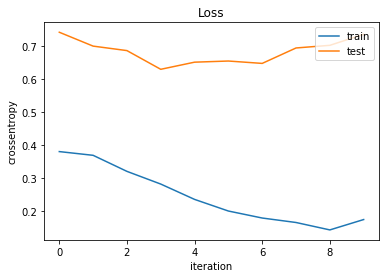

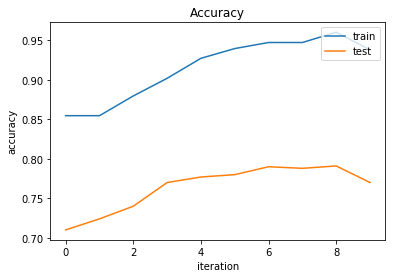

In [45]:
# Confusion Matrix
# Validation: Confusion Matrix Analysis
def plot_confusion_matrix(model_input, feature, label, class_info):
    pred = model_input.predict(feature)
    cnf_matrix = confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    tick_marks = np.arange(len(class_info))
    plt.xticks(tick_marks, class_info, rotation=45), plt.yticks(tick_marks, class_info)
    thresh = cnf_matrix.max()/2.
    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            plt.text(j, i, cnf_matrix[i, j], horizontalalignment='center', color='white' if cnf_matrix[i,j]>thresh else 'black')
    plt.ylabel('Actual'), plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
# Validation: Curve Plotting
# Loss
plt.plot(model_history1.history['loss'])
plt.plot(model_history1.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history1.history['acc'])
plt.plot(model_history1.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plot_confusion_matrix(model_cnn, X_test, Y_test, ['Young','Middle','Old'])

In [31]:
# Build Model 2 kernel size
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2,2), padding='same', activation='relu')(model_input)
model_hidden = MaxPooling2D((4,4))(model_hidden)
model_hidden = Conv2D(32, kernel_size=(2,2), padding='same', activation='relu')(model_hidden)
model_hidden = MaxPooling2D((4,4))(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(1024, activation='relu')(model_hidden)
model_hidden = Dense(256, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn2 = Model(model_input, model_output)
model_cnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
__________

In [46]:
model_cnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_history2 = model_cnn2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=250, verbose=2)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
 - 9s - loss: 0.7512 - acc: 0.6660 - val_loss: 0.7822 - val_acc: 0.6500
Epoch 2/10
 - 8s - loss: 0.7162 - acc: 0.6900 - val_loss: 0.7549 - val_acc: 0.6740
Epoch 3/10
 - 8s - loss: 0.6886 - acc: 0.6993 - val_loss: 0.7588 - val_acc: 0.6660
Epoch 4/10
 - 8s - loss: 0.6860 - acc: 0.7017 - val_loss: 0.7429 - val_acc: 0.6750
Epoch 5/10
 - 8s - loss: 0.6660 - acc: 0.7193 - val_loss: 0.7359 - val_acc: 0.6830
Epoch 6/10
 - 8s - loss: 0.6523 - acc: 0.7277 - val_loss: 0.7377 - val_acc: 0.6640
Epoch 7/10
 - 8s - loss: 0.6472 - acc: 0.7260 - val_loss: 0.7349 - val_acc: 0.6640
Epoch 8/10
 - 8s - loss: 0.6228 - acc: 0.7340 - val_loss: 0.7018 - val_acc: 0.6870
Epoch 9/10
 - 8s - loss: 0.5984 - acc: 0.7493 - val_loss: 0.7036 - val_acc: 0.6880
Epoch 10/10
 - 8s - loss: 0.5914 - acc: 0.7563 - val_loss: 0.6852 - val_acc: 0.6910


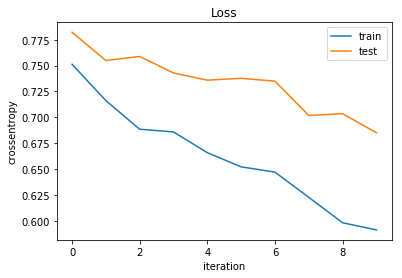

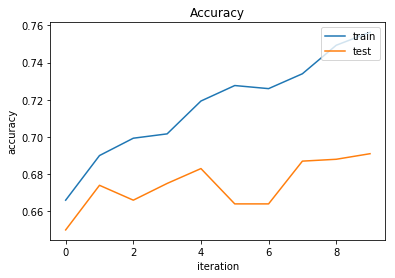

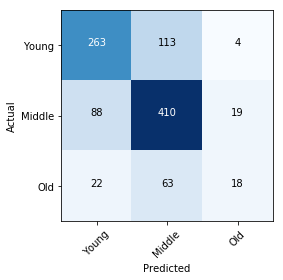

In [47]:
# Validation: Curve Plotting
# Loss
plt.plot(model_history2.history['loss'])
plt.plot(model_history2.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history2.history['acc'])
plt.plot(model_history2.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plot_confusion_matrix(model_cnn2, X_test, Y_test, ['Young','Middle','Old'])

In [33]:
# Build Model 3 kernel number
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(32, kernel_size=(2,2), padding='same', activation='relu')(model_input)
model_hidden = MaxPooling2D((4,4))(model_hidden)
model_hidden = Conv2D(64, kernel_size=(2,2), padding='same', activation='relu')(model_hidden)
model_hidden = MaxPooling2D((4,4))(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(1024, activation='relu')(model_hidden)
model_hidden = Dense(256, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn3 = Model(model_input, model_output)
model_cnn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
__________

In [48]:
model_cnn3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_history3 = model_cnn3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=250, verbose=2)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
 - 15s - loss: 0.8279 - acc: 0.6253 - val_loss: 0.7753 - val_acc: 0.6690
Epoch 2/10
 - 14s - loss: 0.7410 - acc: 0.6873 - val_loss: 0.7493 - val_acc: 0.6660
Epoch 3/10
 - 14s - loss: 0.6916 - acc: 0.7053 - val_loss: 0.7440 - val_acc: 0.6680
Epoch 4/10
 - 15s - loss: 0.6688 - acc: 0.7087 - val_loss: 0.7314 - val_acc: 0.6750
Epoch 5/10
 - 15s - loss: 0.6637 - acc: 0.7070 - val_loss: 0.7171 - val_acc: 0.6800
Epoch 6/10
 - 15s - loss: 0.6417 - acc: 0.7233 - val_loss: 0.7056 - val_acc: 0.6890
Epoch 7/10
 - 14s - loss: 0.6249 - acc: 0.7400 - val_loss: 0.7092 - val_acc: 0.6880
Epoch 8/10
 - 15s - loss: 0.6155 - acc: 0.7400 - val_loss: 0.6771 - val_acc: 0.7220
Epoch 9/10
 - 14s - loss: 0.5837 - acc: 0.7620 - val_loss: 0.6706 - val_acc: 0.7090
Epoch 10/10
 - 15s - loss: 0.5710 - acc: 0.7713 - val_loss: 0.6533 - val_acc: 0.7300


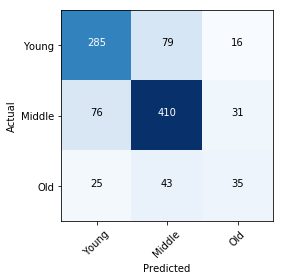

In [49]:
plt.plot(model_history3.history['loss'])
plt.plot(model_history3.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history3.history['acc'])
plt.plot(model_history3.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plot_confusion_matrix(model_cnn3, X_test, Y_test, ['Young','Middle','Old'])

In [36]:
# Build Model 4
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2,2), padding='same', activation='relu')(model_input)
model_hidden = MaxPooling2D((2,2))(model_hidden)
model_hidden = Conv2D(32, kernel_size=(2,2), padding='same', activation='relu')(model_hidden)
model_hidden = MaxPooling2D((2,2))(model_hidden)
model_hidden = Conv2D(64, kernel_size=(2,2), padding='same', activation='relu')(model_hidden)
model_hidden = MaxPooling2D((2,2))(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(1024, activation='relu')(model_hidden)
model_hidden = Dense(256, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn4 = Model(model_input, model_output)
model_cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
__________

In [50]:
model_cnn4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_history4 = model_cnn4.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=250, verbose=2)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
 - 20s - loss: 0.6706 - acc: 0.7160 - val_loss: 0.7071 - val_acc: 0.7080
Epoch 2/10
 - 19s - loss: 0.5778 - acc: 0.7557 - val_loss: 0.7180 - val_acc: 0.7030
Epoch 3/10
 - 19s - loss: 0.5389 - acc: 0.7780 - val_loss: 0.6746 - val_acc: 0.7170
Epoch 4/10
 - 19s - loss: 0.5053 - acc: 0.7930 - val_loss: 0.6795 - val_acc: 0.7280
Epoch 5/10
 - 20s - loss: 0.4641 - acc: 0.8197 - val_loss: 0.6817 - val_acc: 0.7160
Epoch 6/10
 - 19s - loss: 0.4339 - acc: 0.8253 - val_loss: 0.6583 - val_acc: 0.7430
Epoch 7/10
 - 19s - loss: 0.3849 - acc: 0.8550 - val_loss: 0.6258 - val_acc: 0.7530
Epoch 8/10
 - 19s - loss: 0.3625 - acc: 0.8640 - val_loss: 0.6466 - val_acc: 0.7450
Epoch 9/10
 - 19s - loss: 0.3272 - acc: 0.8797 - val_loss: 0.6642 - val_acc: 0.7530
Epoch 10/10
 - 19s - loss: 0.2934 - acc: 0.8910 - val_loss: 0.6998 - val_acc: 0.7440


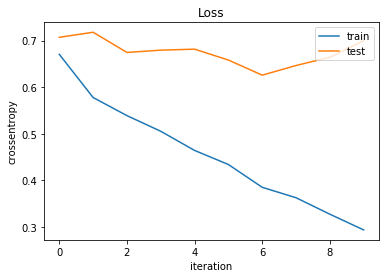

In [51]:
plt.plot(model_history4.history['loss'])
plt.plot(model_history4.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history4.history['acc'])
plt.plot(model_history4.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plot_confusion_matrix(model_cnn4, X_test, Y_test, ['Young','Middle','Old'])

In [38]:
# Build Model 5
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2,2), padding='same', activation='relu')(model_input)
model_hidden = MaxPooling2D((2,2))(model_hidden)
model_hidden = Conv2D(32, kernel_size=(2,2), padding='same', activation='relu')(model_hidden)
model_hidden = MaxPooling2D((2,2))(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(1024, activation='relu')(model_hidden)
model_hidden = Dense(128, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn5 = Model(model_input, model_output)
model_cnn5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              8389632   
__________

In [52]:
model_cnn5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_history5 = model_cnn5.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=250, verbose=2)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
 - 18s - loss: 0.7404 - acc: 0.6677 - val_loss: 0.7683 - val_acc: 0.6610
Epoch 2/10
 - 17s - loss: 0.6646 - acc: 0.7177 - val_loss: 0.7255 - val_acc: 0.6820
Epoch 3/10
 - 17s - loss: 0.6221 - acc: 0.7417 - val_loss: 0.7173 - val_acc: 0.6840
Epoch 4/10
 - 17s - loss: 0.5910 - acc: 0.7513 - val_loss: 0.7142 - val_acc: 0.7000
Epoch 5/10
 - 17s - loss: 0.5603 - acc: 0.7713 - val_loss: 0.6919 - val_acc: 0.6970
Epoch 6/10
 - 18s - loss: 0.5277 - acc: 0.7880 - val_loss: 0.6787 - val_acc: 0.7220
Epoch 7/10
 - 17s - loss: 0.5000 - acc: 0.8033 - val_loss: 0.6607 - val_acc: 0.7340
Epoch 8/10
 - 17s - loss: 0.4593 - acc: 0.8167 - val_loss: 0.6696 - val_acc: 0.7260
Epoch 9/10
 - 17s - loss: 0.4284 - acc: 0.8373 - val_loss: 0.6961 - val_acc: 0.7080
Epoch 10/10
 - 17s - loss: 0.4204 - acc: 0.8303 - val_loss: 0.7001 - val_acc: 0.7230


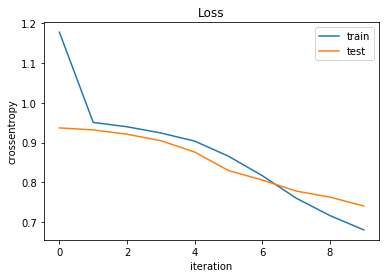

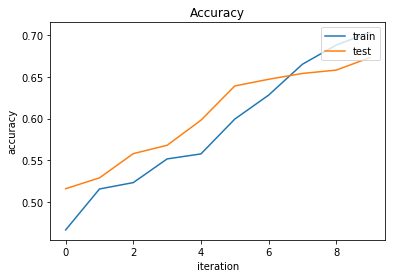

In [40]:
plt.plot(model_history5.history['loss'])
plt.plot(model_history5.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history5.history['acc'])
plt.plot(model_history5.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plot_confusion_matrix(model_cnn5, X_test, Y_test, ['Young','Middle','Old'])

In [55]:
# Build Model 6  Batch & Epoch 
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2,2), padding='same', activation='relu')(model_input)
model_hidden = MaxPooling2D((2,2))(model_hidden)
model_hidden = Conv2D(32, kernel_size=(2,2), padding='same', activation='relu')(model_hidden)
model_hidden = MaxPooling2D((2,2))(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(1024, activation='relu')(model_hidden)
model_hidden = Dense(256, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn6 = Model(model_input, model_output)
model_cnn6.summary()
model_cnn6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_history6 = model_cnn6.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15, batch_size=400, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              8389632   
__________

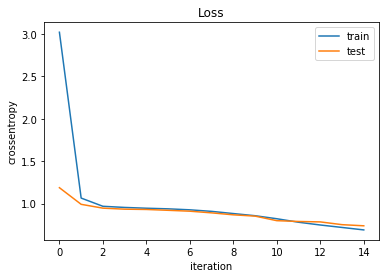

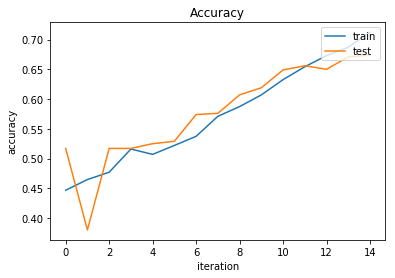

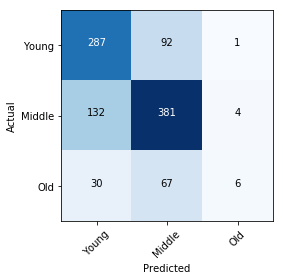

In [56]:
plt.plot(model_history6.history['loss'])
plt.plot(model_history6.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history6.history['acc'])
plt.plot(model_history6.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plot_confusion_matrix(model_cnn6, X_test, Y_test, ['Young','Middle','Old'])